In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
data = tf.keras.datasets.mnist # Hand Written Digits Data
(x_train,y_train) , (x_test,y_test) = data.load_data() # Split data
x_train.shape

(60000, 28, 28)

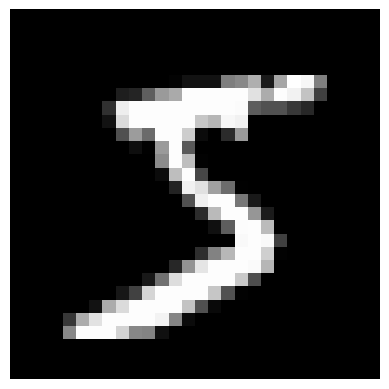

5


In [25]:
image = x_train[0]  # image in first index

# Show image
plt.imshow(image, cmap='gray')  # 'gray' for black-white image
plt.axis('off')  # Hiding axes
plt.show()
print(y_train[0]) 

In [34]:
# We normalized the data to the range of 0 to 1.
x_train = tf.keras.utils.normalize(x_train,axis=1) 
x_test = tf.keras.utils.normalize(x_test,axis=1) 

[5 0 4 ... 5 6 8]


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense


model = Sequential([
    Flatten(input_shape=(28,28)), # input layer , 28x28 image converted to 1D 
    Dense(128,activation='relu'), #  layer has 128 neuron
    Dense(128,activation='relu'),
    Dense(10,activation='softmax') # output layer
])


c:\Users\Furkan-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8710 - loss: 0.4602
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9659 - loss: 0.1086
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9762 - loss: 0.0759
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9822 - loss: 0.0545
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9875 - loss: 0.0389
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9902 - loss: 0.0306
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9923 - loss: 0.0231
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9939 - loss: 0.0181
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9944 - loss: 0.0161
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9951 - loss: 0.0140


In [33]:
loss , accuracy = model.evaluate(x_test,y_test)
print(f"Loss:{loss}\nAccuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9723 - loss: 0.1185  
Loss:0.10570663958787918
Accuracy:0.9764000177383423


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This digit is probably is a 7


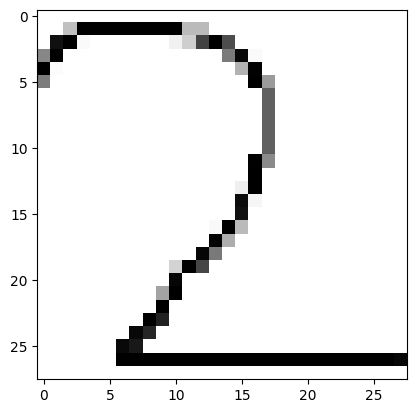

In [61]:
import os
import cv2
image_number = 2
path = "digits/digit"
while os.path.isfile(f"{path}{image_number}.png"):
    try:
        path = f"{path}{image_number}.png"
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
        image = np.invert(image)  # Invert the image (for black digits on white background)
         # Find contours to locate the digit and crop it to focus on the digit only
        contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        x, y, w, h = cv2.boundingRect(contours[0])
        image = image[y:y+h, x:x+w]  # Crop the image around the digit

        # Resize while preserving the aspect ratio and then pad to 28x28
        aspect_ratio = image.shape[1] / image.shape[0]
        new_width = 28
        new_height = int(new_width / aspect_ratio)
        image = cv2.resize(image, (new_width, new_height))  # Resize based on the aspect ratio

        # Create a 28x28 black image and place the resized digit in the center
        padded_image = np.zeros((28, 28), dtype=np.uint8)
        top_left_y = (28 - new_height) // 2
        top_left_x = (28 - new_width) // 2
        padded_image[top_left_y:top_left_y+new_height, top_left_x:top_left_x+new_width] = image

        image = padded_image.astype('float32') / 255.0  # Normalize pixel values to range [0,1]
        image = np.expand_dims(image, axis=-1)  # Add a channel dimension (1 channel for grayscale)
        image = np.expand_dims(image, axis=0)  # Add batch dimension (1 image in batch)
        prediction = model.predict(image)
        print(f"This digit is probably is a {np.argmax(prediction)}")
        plt.imshow(image[0],cmap=plt.cm.binary)
        plt.show()
    except Exception as e:
        print(e)
    finally:
        image_number += 1